## 6.

**Ayuda a Fermat**. La solución de Fermat al problema de la división justa de la
bolsa es impráctica cuando quedan muchas rondas por jugar ya que implica contar
todas las partidas que dan por ganador a uno de los dos jugadores. Afortunadamente con simulaciones Monte Carlo es posible encontrar una solución aproximada. Supongamos que un juego de 51 rondas es interrumpido en la ronda 25 y que Fermat ganó 15 rondas y Pascal 10. Simular el resto de las rondas para decidir cuál jugador gana la partida. Repetir este procedimiento 1000 veces para encontrar la división justa de la bolsa.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
def DivisionJusta(n_rondas = 51, n_inter = 25, F_inter = 15, P_inter = 10):
  # se tira la moneda (n_rondas - n_inter) veces
  coin_toss = np.random.choice([0,1], size = n_rondas - n_inter)
  F_win = F_inter + np.sum(coin_toss == 1)
  P_win = P_inter + np.sum(coin_toss == 0)
  # 1 significa que ganó F y 0 que ganó P y se le suma a las rondas que ya tienen ganadas
  return {"Fermat": F_win, "Pascal": P_win, "Division": F_win > P_win}
jugadas = []
i = 0
while i < 1000:
  i+=1
  jugadas.append(DivisionJusta())
  
Resultado = pd.DataFrame(jugadas)
Resultado

,Fermat,Pascal,Division
0,26,25,True
1,32,19,True
2,28,23,True
3,29,22,True
4,26,25,True
...,...,...,...
995,26,25,True
996,28,23,True
997,31,20,True
998,28,23,True


In [11]:
Resultado.groupby('Division').size()

Division
False    125
True     875
dtype: int64

In [ ]:
Resultado.groupby('Division').size()

<Axes: xlabel='Division'>

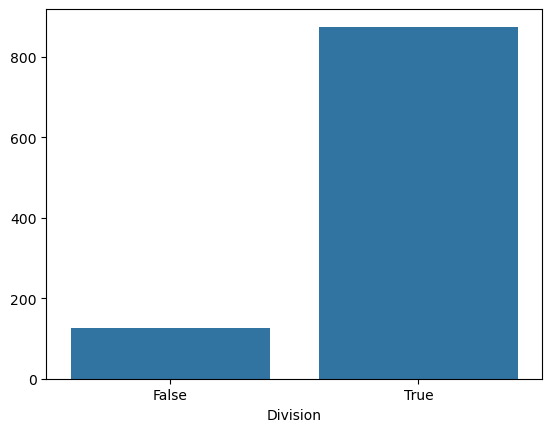

In [13]:
sns.barplot(Resultado.groupby('Division').size())